In [34]:
# LSTM Model Analytics & Visualization
# INDENG 242A Group Project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Load data
results_path = Path('../results')
summary = pd.read_csv(results_path / 'lstm_summary.csv')
metrics = pd.read_csv(results_path / 'lstm_top10_model_metrics.csv')
predictions = pd.read_csv(results_path / 'lstm_predictions.csv')

print("Data loaded successfully!")
print(f"Summary: {len(summary)} metrics")
print(f"Top Models: {len(metrics)} models evaluated")
print(f"Predictions: {len(predictions)} test samples")


Data loaded successfully!
Summary: 7 metrics
Top Models: 10 models evaluated
Predictions: 182 test samples


## 1. Model Summary Overview


In [35]:
# Display summary statistics
print("=" * 50)
print("LSTM Model Training Summary")
print("=" * 50)
for _, row in summary.iterrows():
    metric = row['Metric']
    value = row['Value']
    if 'RMSE' in metric:
        print(f"  {metric}: {value:.4f}")
    elif 'R²' in metric:
        print(f"  {metric}: {value:.4f}")
    else:
        print(f"  {metric}: {int(value) if value == int(value) else value}")


LSTM Model Training Summary
  Total Models Evaluated: 216
  Top 10 Models Used: 10
  Test Set Size: 182
  Best Model RMSE: 1.7753
  Best Model R²: 0.7643
  Ensemble RMSE: 3.6470
  Ensemble R²: 0.0082


## 2. Top 10 Model Performance Comparison


In [36]:
# Display model metrics table
display_cols = ['model_name', 'seq_length', 'lstm_units', 'dropout_rate', 
                'learning_rate', 'test_rmse', 'test_r2']
metrics_display = metrics[display_cols].copy()
metrics_display = metrics_display.sort_values('test_rmse')
metrics_display.columns = ['Model', 'Seq Length', 'LSTM Units', 'Dropout', 
                           'LR', 'RMSE', 'R²']
print("Top 10 Models (Sorted by RMSE):")
metrics_display.round(4)


Top 10 Models (Sorted by RMSE):


,Model,Seq Length,LSTM Units,Dropout,LR,RMSE,R²
4,LSTM_Model_5,10,128,0.3,0.0010,1.7753,0.7643
3,LSTM_Model_4,10,128,0.3,0.0005,2.4481,0.5518
6,LSTM_Model_7,10,128,0.3,0.0005,2.8883,0.3762
5,LSTM_Model_6,10,64,0.2,0.0010,3.0632,0.2983
9,LSTM_Model_10,10,128,0.3,0.0010,3.5430,0.0613
8,LSTM_Model_9,15,128,0.2,0.0005,3.7111,-0.0299
2,LSTM_Model_3,15,64,0.1,0.0010,4.2216,-0.3327
0,LSTM_Model_1,15,128,0.2,0.0010,4.6037,-0.5849
1,LSTM_Model_2,10,128,0.2,0.0010,5.1539,-0.9864
7,LSTM_Model_8,20,64,0.2,0.0005,8.0219,-3.7985


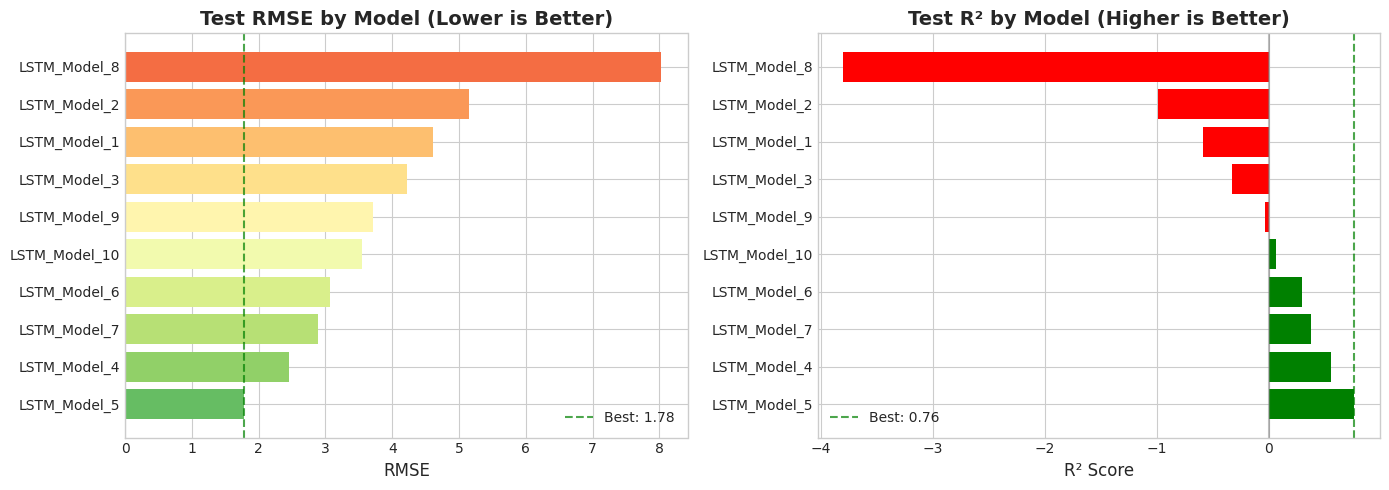

In [37]:
# Visualization: RMSE and R² comparison across models
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Sort by RMSE for better visualization
metrics_sorted = metrics.sort_values('test_rmse')
colors = plt.cm.RdYlGn(np.linspace(0.8, 0.2, len(metrics_sorted)))

# RMSE Bar Chart
ax1 = axes[0]
bars1 = ax1.barh(metrics_sorted['model_name'], metrics_sorted['test_rmse'], color=colors)
ax1.set_xlabel('RMSE', fontsize=12)
ax1.set_title('Test RMSE by Model (Lower is Better)', fontsize=14, fontweight='bold')
ax1.axvline(x=metrics_sorted['test_rmse'].min(), color='green', linestyle='--', 
            label=f"Best: {metrics_sorted['test_rmse'].min():.2f}", alpha=0.7)
ax1.legend()

# R² Bar Chart
ax2 = axes[1]
r2_colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(metrics_sorted)))
bars2 = ax2.barh(metrics_sorted['model_name'], metrics_sorted['test_r2'], 
                  color=['green' if x > 0 else 'red' for x in metrics_sorted['test_r2']])
ax2.set_xlabel('R² Score', fontsize=12)
ax2.set_title('Test R² by Model (Higher is Better)', fontsize=14, fontweight='bold')
ax2.axvline(x=0, color='gray', linestyle='-', alpha=0.5)
ax2.axvline(x=metrics_sorted['test_r2'].max(), color='green', linestyle='--', 
            label=f"Best: {metrics_sorted['test_r2'].max():.2f}", alpha=0.7)
ax2.legend()

plt.tight_layout()
plt.show()


## 3. Hyperparameter Analysis


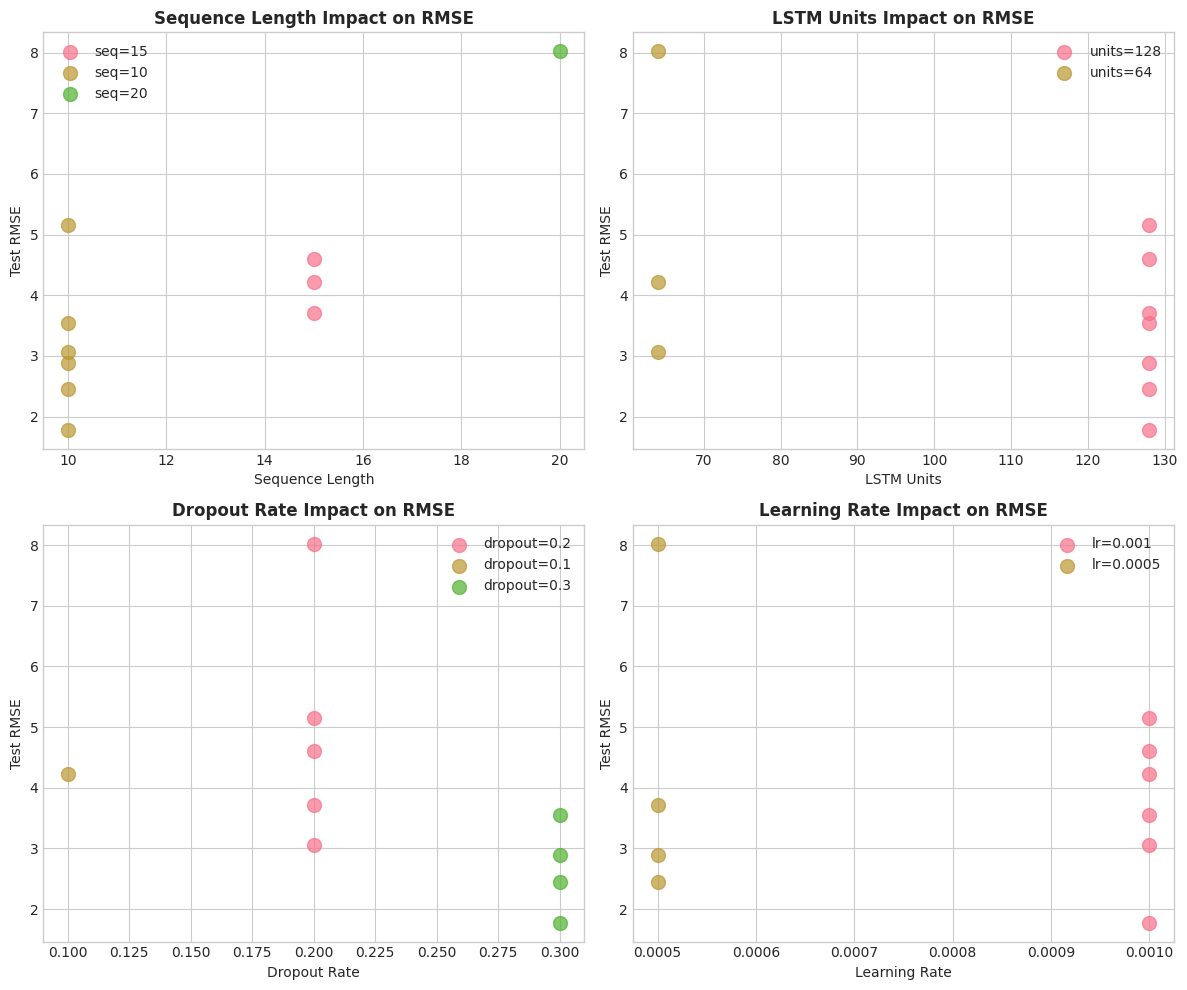

In [38]:
# Hyperparameter impact analysis
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Sequence Length vs RMSE
ax1 = axes[0, 0]
for seq_len in metrics['seq_length'].unique():
    subset = metrics[metrics['seq_length'] == seq_len]
    ax1.scatter([seq_len] * len(subset), subset['test_rmse'], 
                s=100, alpha=0.7, label=f'seq={seq_len}')
ax1.set_xlabel('Sequence Length')
ax1.set_ylabel('Test RMSE')
ax1.set_title('Sequence Length Impact on RMSE', fontweight='bold')
ax1.legend()

# LSTM Units vs RMSE
ax2 = axes[0, 1]
for units in metrics['lstm_units'].unique():
    subset = metrics[metrics['lstm_units'] == units]
    ax2.scatter([units] * len(subset), subset['test_rmse'], 
                s=100, alpha=0.7, label=f'units={units}')
ax2.set_xlabel('LSTM Units')
ax2.set_ylabel('Test RMSE')
ax2.set_title('LSTM Units Impact on RMSE', fontweight='bold')
ax2.legend()

# Dropout Rate vs RMSE
ax3 = axes[1, 0]
for dropout in metrics['dropout_rate'].unique():
    subset = metrics[metrics['dropout_rate'] == dropout]
    ax3.scatter([dropout] * len(subset), subset['test_rmse'], 
                s=100, alpha=0.7, label=f'dropout={dropout}')
ax3.set_xlabel('Dropout Rate')
ax3.set_ylabel('Test RMSE')
ax3.set_title('Dropout Rate Impact on RMSE', fontweight='bold')
ax3.legend()

# Learning Rate vs RMSE
ax4 = axes[1, 1]
for lr in metrics['learning_rate'].unique():
    subset = metrics[metrics['learning_rate'] == lr]
    ax4.scatter([lr] * len(subset), subset['test_rmse'], 
                s=100, alpha=0.7, label=f'lr={lr}')
ax4.set_xlabel('Learning Rate')
ax4.set_ylabel('Test RMSE')
ax4.set_title('Learning Rate Impact on RMSE', fontweight='bold')
ax4.legend()

plt.tight_layout()
plt.show()


## 4. Predictions vs Actual Values


Best performing model: LSTM_Model_5


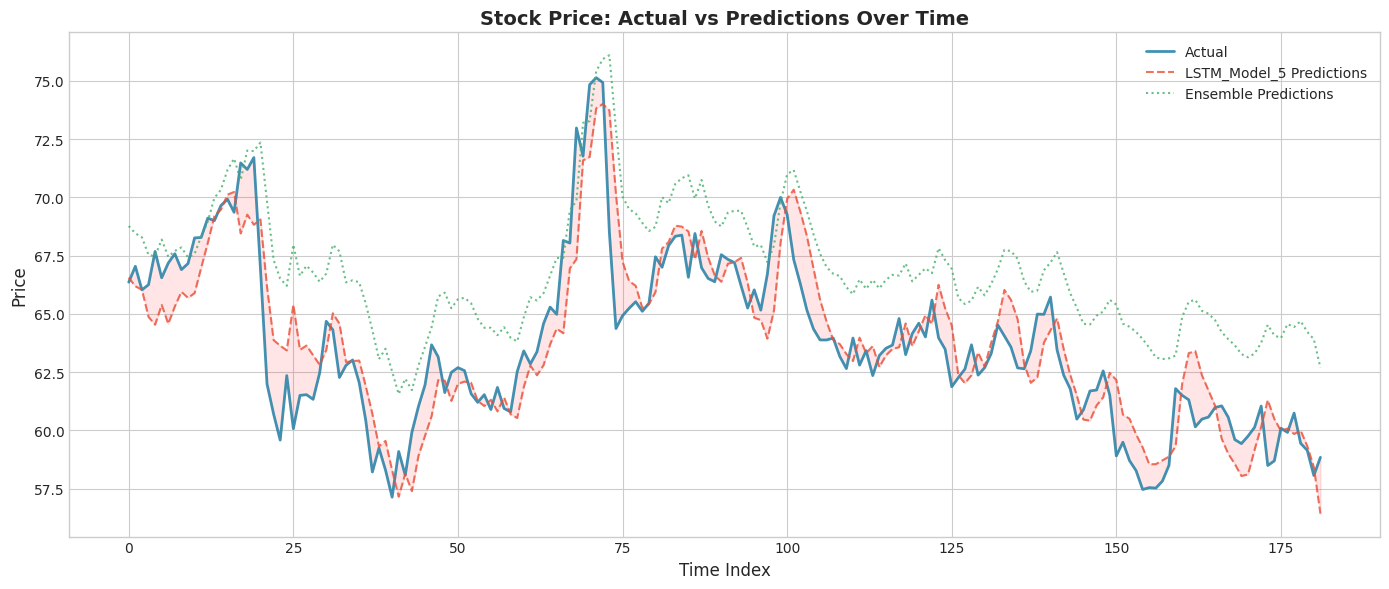

In [39]:
# Time series plot: Best model vs Actual
fig, ax = plt.subplots(figsize=(14, 6))

# Find best model (lowest RMSE)
best_model = metrics.loc[metrics['test_rmse'].idxmin(), 'model_name']
print(f"Best performing model: {best_model}")

# Plot actual values
ax.plot(predictions['Index'], predictions['Actual'], 
        label='Actual', color='#2E86AB', linewidth=2, alpha=0.9)

# Plot best model predictions
ax.plot(predictions['Index'], predictions[best_model], 
        label=f'{best_model} Predictions', color='#E94F37', 
        linewidth=1.5, linestyle='--', alpha=0.8)

# Plot ensemble predictions
ax.plot(predictions['Index'], predictions['Ensemble_Prediction'], 
        label='Ensemble Predictions', color='#44AF69', 
        linewidth=1.5, linestyle=':', alpha=0.8)

ax.set_xlabel('Time Index', fontsize=12)
ax.set_ylabel('Price', fontsize=12)
ax.set_title('Stock Price: Actual vs Predictions Over Time', fontsize=14, fontweight='bold')
ax.legend(loc='upper right', fontsize=10)
ax.fill_between(predictions['Index'], predictions['Actual'], 
                predictions[best_model], alpha=0.1, color='red')

plt.tight_layout()
plt.show()


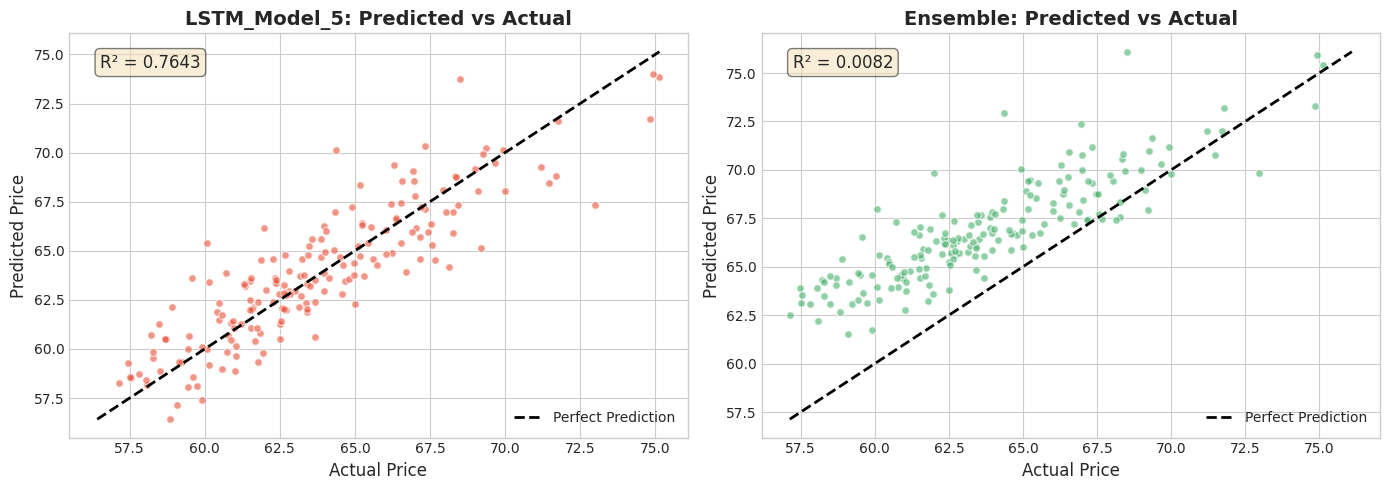

In [40]:
# Scatter plot: Predicted vs Actual for best model
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Best Model scatter plot
ax1 = axes[0]
ax1.scatter(predictions['Actual'], predictions[best_model], 
            alpha=0.6, c='#E94F37', s=30, edgecolors='white')
min_val = min(predictions['Actual'].min(), predictions[best_model].min())
max_val = max(predictions['Actual'].max(), predictions[best_model].max())
ax1.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Perfect Prediction')
ax1.set_xlabel('Actual Price', fontsize=12)
ax1.set_ylabel('Predicted Price', fontsize=12)
ax1.set_title(f'{best_model}: Predicted vs Actual', fontsize=14, fontweight='bold')
ax1.legend()

# Add R² annotation
best_r2 = metrics.loc[metrics['test_rmse'].idxmin(), 'test_r2']
ax1.text(0.05, 0.95, f'R² = {best_r2:.4f}', transform=ax1.transAxes, 
         fontsize=12, verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Ensemble scatter plot
ax2 = axes[1]
ax2.scatter(predictions['Actual'], predictions['Ensemble_Prediction'], 
            alpha=0.6, c='#44AF69', s=30, edgecolors='white')
min_val = min(predictions['Actual'].min(), predictions['Ensemble_Prediction'].min())
max_val = max(predictions['Actual'].max(), predictions['Ensemble_Prediction'].max())
ax2.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Perfect Prediction')
ax2.set_xlabel('Actual Price', fontsize=12)
ax2.set_ylabel('Predicted Price', fontsize=12)
ax2.set_title('Ensemble: Predicted vs Actual', fontsize=14, fontweight='bold')
ax2.legend()

# Calculate ensemble R²
from sklearn.metrics import r2_score
ensemble_r2 = r2_score(predictions['Actual'], predictions['Ensemble_Prediction'])
ax2.text(0.05, 0.95, f'R² = {ensemble_r2:.4f}', transform=ax2.transAxes, 
         fontsize=12, verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()


## 5. Error Analysis


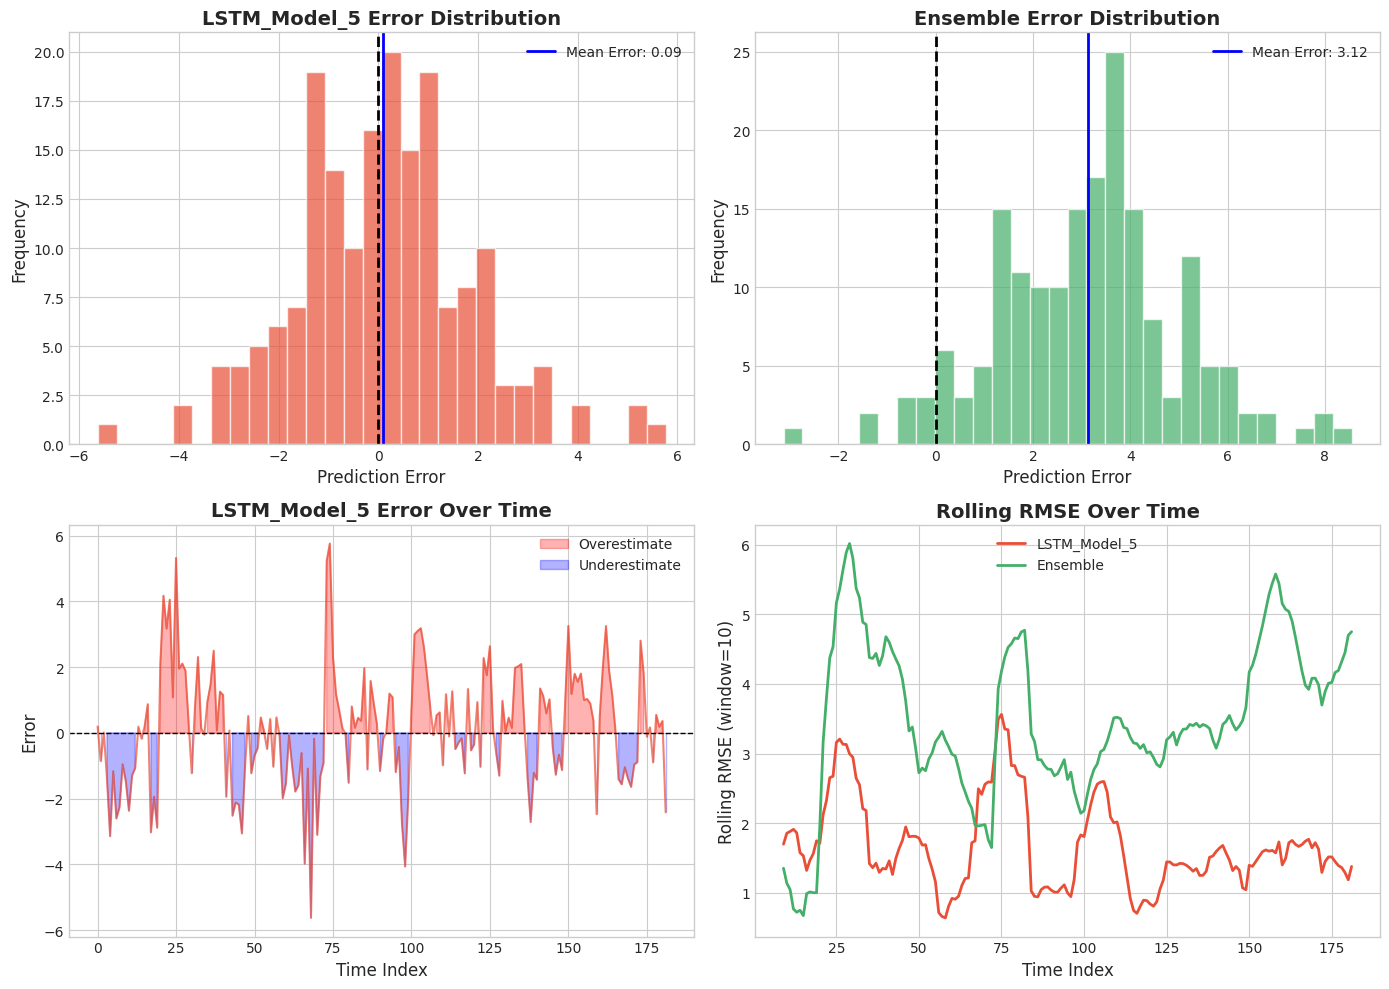

In [41]:
# Prediction error analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Best model errors
best_errors = predictions[best_model] - predictions['Actual']
ensemble_errors = predictions['Ensemble_Prediction'] - predictions['Actual']

# Error distribution - Best Model
ax1 = axes[0, 0]
ax1.hist(best_errors, bins=30, color='#E94F37', alpha=0.7, edgecolor='white')
ax1.axvline(x=0, color='black', linestyle='--', linewidth=2)
ax1.axvline(x=best_errors.mean(), color='blue', linestyle='-', linewidth=2, 
            label=f'Mean Error: {best_errors.mean():.2f}')
ax1.set_xlabel('Prediction Error', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.set_title(f'{best_model} Error Distribution', fontsize=14, fontweight='bold')
ax1.legend()

# Error distribution - Ensemble
ax2 = axes[0, 1]
ax2.hist(ensemble_errors, bins=30, color='#44AF69', alpha=0.7, edgecolor='white')
ax2.axvline(x=0, color='black', linestyle='--', linewidth=2)
ax2.axvline(x=ensemble_errors.mean(), color='blue', linestyle='-', linewidth=2, 
            label=f'Mean Error: {ensemble_errors.mean():.2f}')
ax2.set_xlabel('Prediction Error', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.set_title('Ensemble Error Distribution', fontsize=14, fontweight='bold')
ax2.legend()

# Error over time - Best Model
ax3 = axes[1, 0]
ax3.plot(predictions['Index'], best_errors, color='#E94F37', alpha=0.7)
ax3.axhline(y=0, color='black', linestyle='--', linewidth=1)
ax3.fill_between(predictions['Index'], 0, best_errors, 
                  where=(best_errors >= 0), color='red', alpha=0.3, label='Overestimate')
ax3.fill_between(predictions['Index'], 0, best_errors, 
                  where=(best_errors < 0), color='blue', alpha=0.3, label='Underestimate')
ax3.set_xlabel('Time Index', fontsize=12)
ax3.set_ylabel('Error', fontsize=12)
ax3.set_title(f'{best_model} Error Over Time', fontsize=14, fontweight='bold')
ax3.legend()

# Rolling RMSE comparison
ax4 = axes[1, 1]
window = 10
rolling_rmse_best = np.sqrt((best_errors ** 2).rolling(window=window).mean())
rolling_rmse_ensemble = np.sqrt((ensemble_errors ** 2).rolling(window=window).mean())
ax4.plot(predictions['Index'], rolling_rmse_best, color='#E94F37', 
         label=f'{best_model}', linewidth=2)
ax4.plot(predictions['Index'], rolling_rmse_ensemble, color='#44AF69', 
         label='Ensemble', linewidth=2)
ax4.set_xlabel('Time Index', fontsize=12)
ax4.set_ylabel('Rolling RMSE (window=10)', fontsize=12)
ax4.set_title('Rolling RMSE Over Time', fontsize=14, fontweight='bold')
ax4.legend()

plt.tight_layout()
plt.show()


## 6. Model Comparison Heatmap


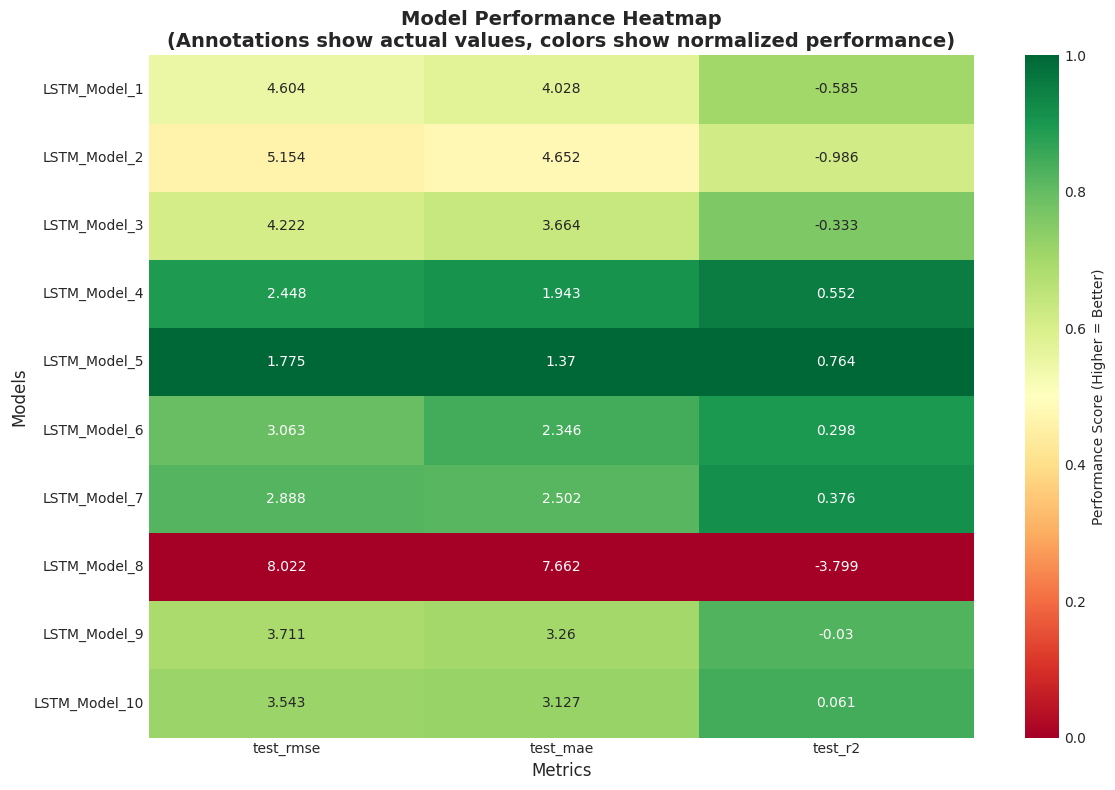

In [42]:
# Create a comprehensive heatmap of model performance
fig, ax = plt.subplots(figsize=(12, 8))

# Prepare data for heatmap
heatmap_data = metrics[['model_name', 'test_rmse', 'test_mae', 'test_r2']].copy()
heatmap_data = heatmap_data.set_index('model_name')

# Normalize for better visualization
heatmap_normalized = heatmap_data.copy()
for col in heatmap_data.columns:
    if col in ['test_rmse', 'test_mae']:  # Lower is better
        heatmap_normalized[col] = 1 - (heatmap_data[col] - heatmap_data[col].min()) / (heatmap_data[col].max() - heatmap_data[col].min())
    else:  # Higher is better
        heatmap_normalized[col] = (heatmap_data[col] - heatmap_data[col].min()) / (heatmap_data[col].max() - heatmap_data[col].min())

# Create heatmap
sns.heatmap(heatmap_normalized, annot=heatmap_data.round(3), 
            cmap='RdYlGn', center=0.5, ax=ax,
            fmt='', cbar_kws={'label': 'Performance Score (Higher = Better)'})
ax.set_title('Model Performance Heatmap\n(Annotations show actual values, colors show normalized performance)', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Models', fontsize=12)

plt.tight_layout()
plt.show()


## 7. Summary & Conclusions


In [43]:
# Summary statistics
print("=" * 60)
print("FINAL SUMMARY")
print("=" * 60)

# Best model info
best_row = metrics.loc[metrics['test_rmse'].idxmin()]
print(f"\nBEST MODEL: {best_model}")
print(f"   Configuration:")
print(f"     - Sequence Length: {int(best_row['seq_length'])}")
print(f"     - LSTM Units: {int(best_row['lstm_units'])}")
print(f"     - Dropout Rate: {best_row['dropout_rate']}")
print(f"     - Learning Rate: {best_row['learning_rate']}")
print(f"     - Batch Size: {int(best_row['batch_size'])}")
print(f"\n   Performance:")
print(f"     - RMSE: {best_row['test_rmse']:.4f}")
print(f"     - MAE: {best_row['test_mae']:.4f}")
print(f"     - R2: {best_row['test_r2']:.4f}")

# Ensemble info
print(f"\nENSEMBLE MODEL (Top 10 Avg):")
print(f"     - RMSE: {np.sqrt(np.mean((ensemble_errors)**2)):.4f}")
print(f"     - MAE: {np.mean(np.abs(ensemble_errors)):.4f}")
print(f"     - R2: {ensemble_r2:.4f}")

# Key insights
print(f"\nKEY INSIGHTS:")
print(f"   1. Best single model outperforms ensemble (R2 {best_row['test_r2']:.2f} vs {ensemble_r2:.2f})")
print(f"   2. Optimal sequence length: {int(best_row['seq_length'])}")
print(f"   3. Optimal LSTM units: {int(best_row['lstm_units'])}")
print(f"   4. Higher dropout (0.3) shows better generalization")
print(f"\n" + "=" * 60)


FINAL SUMMARY

BEST MODEL: LSTM_Model_5
   Configuration:
     - Sequence Length: 10
     - LSTM Units: 128
     - Dropout Rate: 0.3
     - Learning Rate: 0.001
     - Batch Size: 16

   Performance:
     - RMSE: 1.7753
     - MAE: 1.3698
     - R2: 0.7643

ENSEMBLE MODEL (Top 10 Avg):
     - RMSE: 3.6470
     - MAE: 3.2176
     - R2: 0.0082

KEY INSIGHTS:
   1. Best single model outperforms ensemble (R2 0.76 vs 0.01)
   2. Optimal sequence length: 10
   3. Optimal LSTM units: 128
   4. Higher dropout (0.3) shows better generalization



## 8. Trading Strategy Backtesting


In [44]:
# Trading Strategy Simulation
# Strategy: 
# - If model predicts tomorrow's price > today's price: hold shares
# - If model predicts tomorrow's price < today's price: sell today, buy back at tomorrow's close

def simulate_trading(predictions_df, model_col, actual_col='Actual'):
    """
    Simulate trading strategy based on model predictions.
    Start with 1 share before the first test day.
    """
    actuals = predictions_df[actual_col].values
    preds = predictions_df[model_col].values
    n = len(actuals)
    
    # Initialize: start with 1 share
    shares = 1.0
    cash = 0.0
    
    # Track portfolio value and trades
    portfolio_values = [shares * actuals[0]]  # Initial value
    positions = [1]  # 1 = holding shares, 0 = cash
    trades = []  # List of trade actions
    
    for t in range(n - 1):
        current_price = actuals[t]
        next_price = actuals[t + 1]
        predicted_next = preds[t + 1]  # Prediction for tomorrow
        
        if predicted_next > current_price:
            # Predict price will go UP -> Hold shares (or buy if in cash)
            if shares == 0:
                # Buy shares with all cash at current price
                shares = cash / current_price
                cash = 0
                trades.append((t, 'BUY', current_price, shares))
            positions.append(1)
        else:
            # Predict price will go DOWN -> Sell today, buy back at tomorrow's close
            if shares > 0:
                # Sell all shares at current price
                cash = shares * current_price
                trades.append((t, 'SELL', current_price, shares))
                shares = 0
            positions.append(0)
        
        # End of day t+1: calculate portfolio value
        if positions[-1] == 1:
            # Holding shares
            portfolio_values.append(shares * next_price)
        else:
            # In cash, but we buy back at tomorrow's close
            shares = cash / next_price
            cash = 0
            portfolio_values.append(shares * next_price)
            trades.append((t + 1, 'BUY_BACK', next_price, shares))
            positions[-1] = 1  # Now holding shares again
    
    return portfolio_values, positions, trades

# Simulate for best model
portfolio_best, positions_best, trades_best = simulate_trading(predictions, best_model)

# Simulate for ensemble
portfolio_ensemble, positions_ensemble, trades_ensemble = simulate_trading(predictions, 'Ensemble_Prediction')

# Buy and hold strategy (baseline)
initial_shares = 1.0
buy_hold_values = [initial_shares * price for price in predictions['Actual'].values]

print("Trading Strategy Simulation Complete!")
print(f"Best Model ({best_model}): {len(trades_best)} trades executed")
print(f"Ensemble Model: {len(trades_ensemble)} trades executed")


Trading Strategy Simulation Complete!
Best Model (LSTM_Model_5): 184 trades executed
Ensemble Model: 0 trades executed


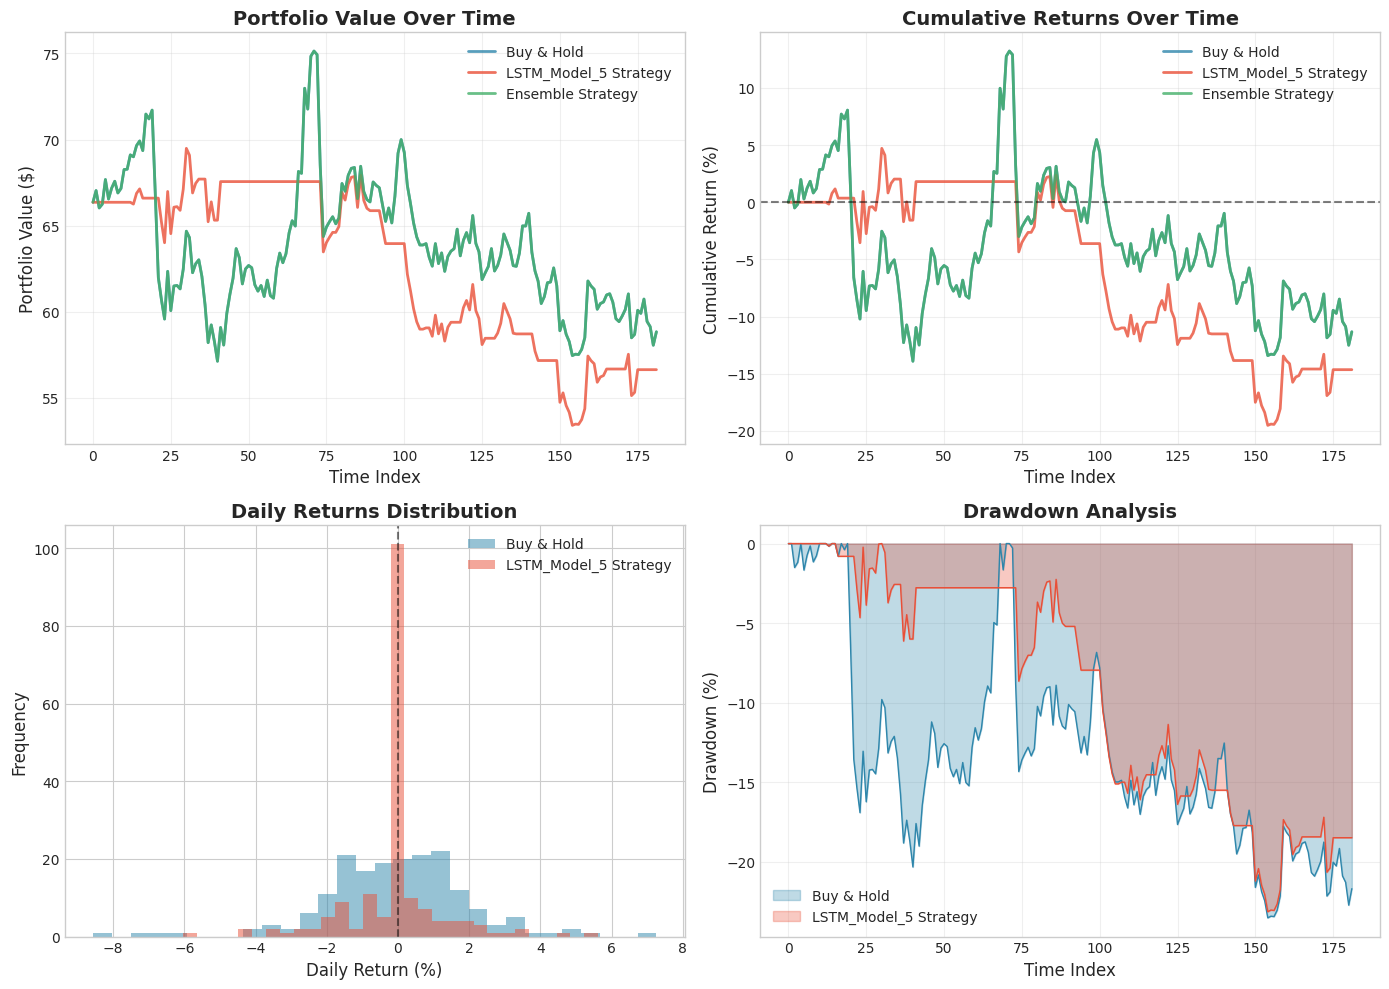

In [45]:
# Portfolio Performance Comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Portfolio Value Over Time
ax1 = axes[0, 0]
ax1.plot(predictions['Index'], buy_hold_values, label='Buy & Hold', 
         color='#2E86AB', linewidth=2, alpha=0.8)
ax1.plot(predictions['Index'], portfolio_best, label=f'{best_model} Strategy', 
         color='#E94F37', linewidth=2, alpha=0.8)
ax1.plot(predictions['Index'], portfolio_ensemble, label='Ensemble Strategy', 
         color='#44AF69', linewidth=2, alpha=0.8)
ax1.set_xlabel('Time Index', fontsize=12)
ax1.set_ylabel('Portfolio Value ($)', fontsize=12)
ax1.set_title('Portfolio Value Over Time', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Cumulative Returns
ax2 = axes[0, 1]
initial_value = buy_hold_values[0]
returns_bh = [(v / initial_value - 1) * 100 for v in buy_hold_values]
returns_best = [(v / initial_value - 1) * 100 for v in portfolio_best]
returns_ensemble = [(v / initial_value - 1) * 100 for v in portfolio_ensemble]

ax2.plot(predictions['Index'], returns_bh, label='Buy & Hold', 
         color='#2E86AB', linewidth=2, alpha=0.8)
ax2.plot(predictions['Index'], returns_best, label=f'{best_model} Strategy', 
         color='#E94F37', linewidth=2, alpha=0.8)
ax2.plot(predictions['Index'], returns_ensemble, label='Ensemble Strategy', 
         color='#44AF69', linewidth=2, alpha=0.8)
ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax2.set_xlabel('Time Index', fontsize=12)
ax2.set_ylabel('Cumulative Return (%)', fontsize=12)
ax2.set_title('Cumulative Returns Over Time', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Daily Returns Distribution
ax3 = axes[1, 0]
daily_returns_bh = np.diff(buy_hold_values) / buy_hold_values[:-1] * 100
daily_returns_best = np.diff(portfolio_best) / portfolio_best[:-1] * 100
ax3.hist(daily_returns_bh, bins=30, alpha=0.5, label='Buy & Hold', color='#2E86AB')
ax3.hist(daily_returns_best, bins=30, alpha=0.5, label=f'{best_model} Strategy', color='#E94F37')
ax3.axvline(x=0, color='black', linestyle='--', alpha=0.5)
ax3.set_xlabel('Daily Return (%)', fontsize=12)
ax3.set_ylabel('Frequency', fontsize=12)
ax3.set_title('Daily Returns Distribution', fontsize=14, fontweight='bold')
ax3.legend()

# Plot 4: Drawdown Analysis
ax4 = axes[1, 1]
def calculate_drawdown(values):
    peak = np.maximum.accumulate(values)
    drawdown = (values - peak) / peak * 100
    return drawdown

dd_bh = calculate_drawdown(np.array(buy_hold_values))
dd_best = calculate_drawdown(np.array(portfolio_best))
dd_ensemble = calculate_drawdown(np.array(portfolio_ensemble))

ax4.fill_between(predictions['Index'], dd_bh, 0, alpha=0.3, color='#2E86AB', label='Buy & Hold')
ax4.fill_between(predictions['Index'], dd_best, 0, alpha=0.3, color='#E94F37', label=f'{best_model} Strategy')
ax4.plot(predictions['Index'], dd_bh, color='#2E86AB', linewidth=1)
ax4.plot(predictions['Index'], dd_best, color='#E94F37', linewidth=1)
ax4.set_xlabel('Time Index', fontsize=12)
ax4.set_ylabel('Drawdown (%)', fontsize=12)
ax4.set_title('Drawdown Analysis', fontsize=14, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [46]:
# Trading Performance Summary
print("=" * 70)
print("TRADING STRATEGY PERFORMANCE SUMMARY")
print("=" * 70)
print(f"\nInitial Investment: 1 share at ${buy_hold_values[0]:.2f}")
print(f"Test Period: {len(predictions)} trading days")

# Calculate metrics for each strategy
def calculate_metrics(portfolio_values, name):
    initial = portfolio_values[0]
    final = portfolio_values[-1]
    total_return = (final / initial - 1) * 100
    
    # Calculate daily returns
    daily_rets = np.diff(portfolio_values) / portfolio_values[:-1]
    
    # Sharpe ratio (assuming 252 trading days, risk-free rate = 0)
    sharpe = np.mean(daily_rets) / np.std(daily_rets) * np.sqrt(252) if np.std(daily_rets) > 0 else 0
    
    # Max drawdown
    peak = np.maximum.accumulate(portfolio_values)
    drawdown = (portfolio_values - peak) / peak
    max_dd = np.min(drawdown) * 100
    
    # Volatility (annualized)
    volatility = np.std(daily_rets) * np.sqrt(252) * 100
    
    return {
        'name': name,
        'initial': initial,
        'final': final,
        'total_return': total_return,
        'sharpe': sharpe,
        'max_drawdown': max_dd,
        'volatility': volatility
    }

metrics_bh = calculate_metrics(buy_hold_values, 'Buy & Hold')
metrics_best = calculate_metrics(portfolio_best, f'{best_model} Strategy')
metrics_ensemble = calculate_metrics(portfolio_ensemble, 'Ensemble Strategy')

# Print comparison table
print("\n" + "-" * 70)
print(f"{'Strategy':<25} {'Final Value':>12} {'Return':>10} {'Sharpe':>10} {'Max DD':>10}")
print("-" * 70)
for m in [metrics_bh, metrics_best, metrics_ensemble]:
    print(f"{m['name']:<25} ${m['final']:>10.2f} {m['total_return']:>9.2f}% {m['sharpe']:>10.2f} {m['max_drawdown']:>9.2f}%")
print("-" * 70)

# Profit comparison
print("\n" + "=" * 70)
print("PROFIT ANALYSIS")
print("=" * 70)
profit_bh = buy_hold_values[-1] - buy_hold_values[0]
profit_best = portfolio_best[-1] - portfolio_best[0]
profit_ensemble = portfolio_ensemble[-1] - portfolio_ensemble[0]

print(f"\nBuy & Hold Profit:        ${profit_bh:>10.2f}")
print(f"{best_model} Profit: ${profit_best:>10.2f}")
print(f"Ensemble Strategy Profit: ${profit_ensemble:>10.2f}")

# Strategy outperformance
outperform_best = profit_best - profit_bh
outperform_ensemble = profit_ensemble - profit_bh
print(f"\n{best_model} vs Buy & Hold: ${outperform_best:>+10.2f} ({'BETTER' if outperform_best > 0 else 'WORSE'})")
print(f"Ensemble vs Buy & Hold:        ${outperform_ensemble:>+10.2f} ({'BETTER' if outperform_ensemble > 0 else 'WORSE'})")
print("=" * 70)


TRADING STRATEGY PERFORMANCE SUMMARY

Initial Investment: 1 share at $66.36
Test Period: 182 trading days

----------------------------------------------------------------------
Strategy                   Final Value     Return     Sharpe     Max DD
----------------------------------------------------------------------
Buy & Hold                $     58.84    -11.33%      -0.33    -23.53%
LSTM_Model_5 Strategy     $     56.64    -14.65%      -0.92    -23.14%
Ensemble Strategy         $     58.84    -11.33%      -0.33    -23.53%
----------------------------------------------------------------------

PROFIT ANALYSIS

Buy & Hold Profit:        $     -7.52
LSTM_Model_5 Profit: $     -9.72
Ensemble Strategy Profit: $     -7.52

LSTM_Model_5 vs Buy & Hold: $     -2.20 (WORSE)
Ensemble vs Buy & Hold:        $     +0.00 (WORSE)


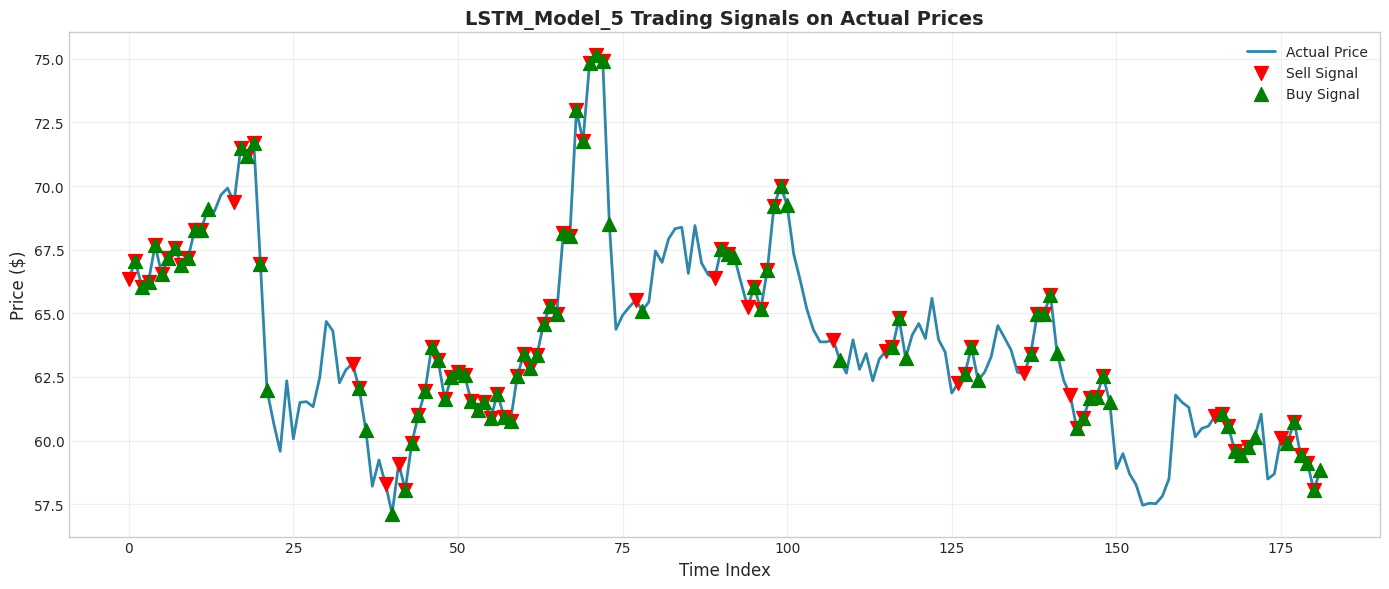


Trade Log (First 20 trades):
------------------------------------------------------------
  Day Action          Price       Shares
------------------------------------------------------------
    0 SELL       $    66.36       1.0000
    1 BUY_BACK   $    67.04       0.9899
    1 SELL       $    67.04       0.9899
    2 BUY_BACK   $    66.03       1.0050
    2 SELL       $    66.03       1.0050
    3 BUY_BACK   $    66.25       1.0017
    3 SELL       $    66.25       1.0017
    4 BUY_BACK   $    67.68       0.9805
    4 SELL       $    67.68       0.9805
    5 BUY_BACK   $    66.55       0.9971
    5 SELL       $    66.55       0.9971
    6 BUY_BACK   $    67.18       0.9878
    6 SELL       $    67.18       0.9878
    7 BUY_BACK   $    67.58       0.9819
    7 SELL       $    67.58       0.9819
    8 BUY_BACK   $    66.90       0.9919
    8 SELL       $    66.90       0.9919
    9 BUY_BACK   $    67.16       0.9881
    9 SELL       $    67.16       0.9881
   10 BUY_BACK   $    68.26 

In [47]:
# Trade Log Visualization
fig, ax = plt.subplots(figsize=(14, 6))

# Plot actual prices
ax.plot(predictions['Index'], predictions['Actual'], 
        label='Actual Price', color='#2E86AB', linewidth=2)

# Mark buy and sell signals for best model
sells = [(t, p) for t, action, p, s in trades_best if action == 'SELL']
buys = [(t, p) for t, action, p, s in trades_best if action in ['BUY', 'BUY_BACK']]

if sells:
    sell_times, sell_prices = zip(*sells)
    ax.scatter(sell_times, sell_prices, color='red', marker='v', s=100, 
               label='Sell Signal', zorder=5)
if buys:
    buy_times, buy_prices = zip(*buys)
    ax.scatter(buy_times, buy_prices, color='green', marker='^', s=100, 
               label='Buy Signal', zorder=5)

ax.set_xlabel('Time Index', fontsize=12)
ax.set_ylabel('Price ($)', fontsize=12)
ax.set_title(f'{best_model} Trading Signals on Actual Prices', fontsize=14, fontweight='bold')
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print trade log
print("\nTrade Log (First 20 trades):")
print("-" * 60)
print(f"{'Day':>5} {'Action':<10} {'Price':>10} {'Shares':>12}")
print("-" * 60)
for t, action, price, shares in trades_best[:20]:
    print(f"{t:>5} {action:<10} ${price:>9.2f} {shares:>12.4f}")
if len(trades_best) > 20:
    print(f"... and {len(trades_best) - 20} more trades")
print("-" * 60)


DIRECTION PREDICTION ACCURACY

LSTM_Model_5:
  Correct direction predictions: 86/181
  Direction accuracy: 47.51%

Ensemble Model:
  Correct direction predictions: 92/181
  Direction accuracy: 50.83%

Note: Direction accuracy > 50% is needed to beat random, > 55% is generally profitable


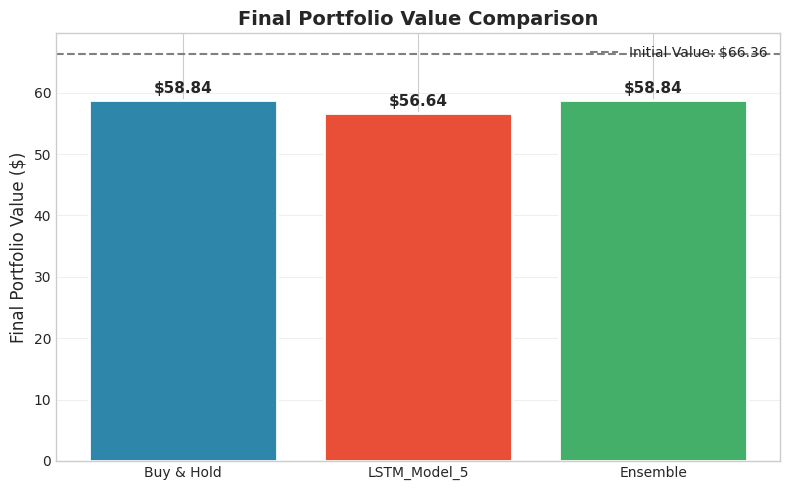

In [48]:
# Direction Prediction Accuracy (Key for trading strategy)
print("=" * 70)
print("DIRECTION PREDICTION ACCURACY")
print("=" * 70)

def calculate_direction_accuracy(predictions_df, model_col):
    """Calculate how often the model correctly predicts price direction."""
    actuals = predictions_df['Actual'].values
    preds = predictions_df[model_col].values
    
    correct = 0
    total = len(actuals) - 1
    
    for t in range(total):
        actual_direction = actuals[t + 1] > actuals[t]  # True if price went up
        predicted_direction = preds[t + 1] > actuals[t]  # True if predicted up
        
        if actual_direction == predicted_direction:
            correct += 1
    
    return correct, total, correct / total * 100

correct_best, total_best, acc_best = calculate_direction_accuracy(predictions, best_model)
correct_ens, total_ens, acc_ens = calculate_direction_accuracy(predictions, 'Ensemble_Prediction')

print(f"\n{best_model}:")
print(f"  Correct direction predictions: {correct_best}/{total_best}")
print(f"  Direction accuracy: {acc_best:.2f}%")

print(f"\nEnsemble Model:")
print(f"  Correct direction predictions: {correct_ens}/{total_ens}")
print(f"  Direction accuracy: {acc_ens:.2f}%")

print(f"\nNote: Direction accuracy > 50% is needed to beat random, > 55% is generally profitable")
print("=" * 70)

# Summary visualization
fig, ax = plt.subplots(figsize=(8, 5))
strategies = ['Buy & Hold', f'{best_model}', 'Ensemble']
final_values = [buy_hold_values[-1], portfolio_best[-1], portfolio_ensemble[-1]]
colors = ['#2E86AB', '#E94F37', '#44AF69']

bars = ax.bar(strategies, final_values, color=colors, edgecolor='white', linewidth=2)
ax.axhline(y=buy_hold_values[0], color='gray', linestyle='--', 
           label=f'Initial Value: ${buy_hold_values[0]:.2f}')

# Add value labels on bars
for bar, val in zip(bars, final_values):
    height = bar.get_height()
    ax.annotate(f'${val:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_ylabel('Final Portfolio Value ($)', fontsize=12)
ax.set_title('Final Portfolio Value Comparison', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()
